# Cuaderno de aprendizaje de Inteligencia artificial
*Para leer esta guia es necesario ya saber programar en python, y tener bases en matematica y algebra lineal.*

*Recuerda ir ejecutando las celdas conforme vayas leyendo esta guia.*

## Regresion lineal

El corazon de la inteligencia artificial es la regresion linea, el modelo matematico de prediccion mas conocido. Cuando tenemos una cantidad de datos nosotros podemos observar una tendencia y predecir un valor desconocido para nuestros datos.
 <img src="Linear_regression.svg" alt="regression"> 
Pues esto tan facil es la base de la inteligencia artificial, en cada neurona artificial se esconde una regresion lineal. Para nosotros esto es algo muy facil de realizar, podemos trazar la linea al ojo, pero para un computador esto es un poco mas complicado, ahora vamos a ver como programar nuestra propia regresion linear en python, y así iniciar nuestro viaje en el mundo de la inteligencia artificial.

### Predecir precios de casas
Acabamos de mudarnos a Boston y estamos buscando una casa para vivir, pero hay demasiados precios y casas muy diferentes, pero siendo expertos en el analisis de datos vamos a utilizar varios datos sobre las viviendas de boston para poder predecir o adivinar los precios de las viviendas segun la cantidad de habitaciones de cada una.

### Librerias
Primero que todo necesitamos una librerias que nos van a permitir trabajar facilmente con las matematicas y los datos.  

* ***Numpy:*** Nos permite realizar operaciones con matrices mucho mas facil, así no tendremos que programar los algoritmos para operar matrices desde cero.  

In [1]:
import numpy as np

* ***Matplotlib:*** Nos permite graficar nuestro datos para poder entenderlos mas facilmente.

In [2]:
import matplotlib.pyplot as plt

* ***Sklearn:*** Es una libreria que contiene muchas herramientas para la programacion de inteligencias artificiales, entre estas herramientas estan muchos sets de datos para practicar. Sklearn ya tiene la herramienta de regresion lineal, pero en este cuaderno vamos a aprender las matematicas de la regresion lineal así que vamos a programarla desde cero, por lo que solo vamos a utilizar el grupo de datos de las casas en boston.

In [3]:
from sklearn.datasets import load_boston

### Set de datos
Vamos a descargar el set de datos de las casas en boston desde la libreria de sklearn.

In [4]:
boston = load_boston()

#Puedes ejecutar la siguiente linea para ver la descripcion del dataset.
#print(boston.DESCR) 

### Construccion de nuestra matriz

Este dataset contiene muchos datos sobre las viviendas en boston, pero nosotros solamente vamos a utilizar los datos de los precios y la cantidad de habitaciones por vivienda.

1. En nuestor eje X (o datos de entrada) vamos a colocar la cantidad de habitaciones promedio por vivienda.

In [5]:
X = boston.data[:,5] 
#En la descripcion del dataset podemos ver los indices de nuestros datos.
#Para ver los indices del dataset revisar la descripcion del dataset: boston.DESCR

2. En nuestro eje Y (o datos de salida) vamos a colocar los precios de las viviendas

In [6]:
Y = boston.target 
#En este dataset el precio de las viviendas está en la variable target
#Para ver los indices del dataset revisar la descripcion del dataset: boston.DESCR

3. La libreria numpy trabaja con arrays para operar, así que para poder utilizar las funciones matematicas de numpy debemos convertir las matrices a arrays.

In [7]:
X = np.array(X)
Y = np.array(Y)

Ahora vamos a visualizar nuestra matriz, para esto vamos a utilizar matplotlib.

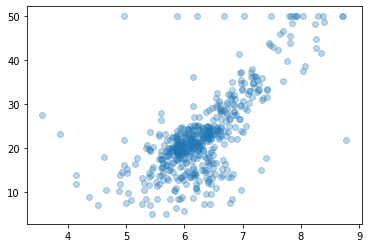

In [8]:
plt.scatter(X,Y,alpha=.3)
plt.show()

### Dibujando nuestra linea predictiva
Con esta grafica podemos observar que existe una relacion directa entre el numero de habitaciones y el precio, solo con esto podriamos dibujar nuestra linea para predecir los valores.  
En matematicas una linea recta puede escribirse como una funcion $y=ax+b$, en esta funcion $a$ representa la pendiente de nuestra linea y $b$ el punto de corte con el eje y, estos 2 valores $a$ y $b$ seran los valores que podemos variar para acercar nuestra linea predictiva al comportamiento de nuestros datos.

* Vamos a programar nuestra funcion
$$y=ax+b$$

In [9]:
a = 13 #Puedes modificar este valor para variar la pendiente
b = -60 #Puedes modificar este valor para cambiar el punto de interseccion con Y
x = np.array([4,5,6,7,8,9]) #Estos son los valores de prueba

modelo = lambda x: (a*x)+b #Esta es la funcion de nuestra recta

y = modelo(x)

#imprimimos los valores de x y de y
print("x = ",x)
print("y = ",y)

x =  [4 5 6 7 8 9]
y =  [-8  5 18 31 44 57]


* Grafiquemos nuestra linea recta sobre nuestros datos

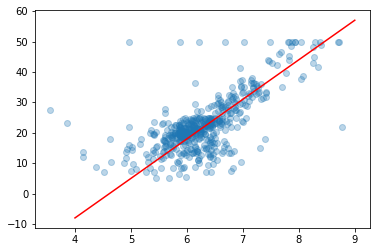

In [10]:
plt.scatter(X,Y,alpha=.3)  # Datos.
plt.plot(x,y,color = "red")# Linea recta.
plt.show()

Ahora si queremos encontrar el valor aproximado del valor que deseamos solo debemos ingresarlo en nuestro modelo matematico.

Vamos a aproximar el valor de una casa de 10 habitaciones utilizando nuestro modelo matematico.

In [11]:
prediccion = modelo(10)

print(str(prediccion) + "K dolares")

70K dolares


Así de facil tendriamos nuestra funcion o modelo matematico para predecir el precio aproximado de una vivienda segun la cantidad de habitaciones, pero hay un problema y es que los valores de $a$ y $b$ los ajustamos manualmente para que fuera lo mas parecido a nuestros datos, pero imaginense tener que hacer esto con millones de datos y cientos de valores de entrada, seria imposible, nosotros lo que queremos es que esto se haga automaticamente, por lo que vamos a programar un algoritmo que ajuste los valores de *a* y *b* obteniento el menor grado de error en nuestro modelo.

## Minimos cuadrados ordinarios
Para encontrar el grado de error de un modelo con respecto a los datos tenemos un metodo llamado error cuadratico, esta es la suma del cuadrado de todos los errores.  
El error de un dato con respecto a nuestro modelo es el valor predicho menos el valor real.

$$
    \text{Modelo:}\\
    y=w_1 +w_2 x\\
    \text{El error:}\\
    e = (w_1 + w_2 x) - y_r
$$

Este seria solo el error de un punto, pero nosotros necesitamos la suma de todos los errores elevados al cuadrado (se eleva al cuadrado para que los puntos mas alejados tengan mas "peso" que los mas cercanos).
$$
    \sum_{i=1}^{n}error^2 = \sum_{i=1}^{n}((w_1+w_2 x_{i})-y_{r_i})^2
$$
Esta seria nuestra ecuacion del error, para obtener nuestro $w_1$ y $w_2$ tendriamos que optimizar nuestro esto, si recuerdan en calculo para saber el valor que optimiza nuestra funcion tenemos que derivar e igualar a 0, pues esto mismo es lo que necesitamos hacer en nuestro error cuadratico.

Para entender todo esto es mejor hacer un ejemplo.

Nuestros datos seran:
$$
    X = \begin{bmatrix}
        1\\
        2\\
        4\\
        5\\
        7
        \end{bmatrix}\text{ , }\ \ 
    Y_r = \begin{bmatrix}
        2\\
        3\\
        7\\
        5\\
        11
        \end{bmatrix}
$$

Error cuadratico:

$$
    e = (w_1+w_2 1-2)^2 +(w_1+w_2 2-3)^2+(w_1+w_2 4-7)^2+(w_1+w_2 5-5)^2+(w_1+w_2 7-11)^2\\ \ 
$$


Ahora debemos derivar e igualar a 0:

$$
    \frac{\mathrm{d} e}{\mathrm{d} w_1} = 0 \\ \ \\
    2(1)(w_1+w_2 1-2)+2(1)(w_1+w_2 2-3)+2(1)(w_1+w_2 4-7)+2(1)(w_1+w_2 5-5)+2(1)(w_1+w_2 7-11)=0\\ \  \\
    (w_1+w_2 1-2)+(w_1+w_2 2-3)+(w_1+w_2 4-7)+(w_1+w_2 5-5)+(w_1+w_2 7-11)=0\\ \  \\
    5w_1+19w_2=28\\ \ \\ \ \\
    \frac{\mathrm{d} e}{\mathrm{d} w_2} = 0 \\ \ \\
    2(1)(w_1+w_2 1-2)+2(2)(w_1+w_2 2-3)+2(4)(w_1+w_2 4-7)+2(5)(w_1+w_2 5-5)+2(7)(w_1+w_2 7-11)=0\\ \  \\
    2(w_1+w_2 1-2)+2(w_1+w_2 2-3)+2(w_1+w_2 4-7)+2(w_1+w_2 5-5)+2(w_1+w_2 7-11)=0\\ \  \\
    19w_1+95w_2=138\\ \ \\ \ \\
    5w_1+19w_2=28\\
    19w_1+95w_2=138\\ \ 
$$

Con este sistema de ecuaciones ya podemos obtener los valores para $w_1$ y $w_2$ donde el error sea el minimo.

$$
    5w_1+19w_2=28\\
    w_1=\frac{28-19w_2}{5}\\ \ \\ \ \\
    19\left( \frac{28-19w_2}{5}\right) +95w_2= 138\\
    \frac{532-361w_2}{5} +95w_2= 138\\
    \frac{532-361w_2+475w_2}{5}=138\\
    532+114w_2=690\\
    w_2=\frac{79}{57}\\ \ \\ \ \\
    w_1=\frac{28-19\left( \frac{79}{57}\right) }{5}\\
    w_1=\frac{1}{3}\\ \ \\ \ \\ \ 
    \large{
    w_2=\frac{79}{57}\\
    w_1=\frac{1}{3}\\
    }
$$

Ahora que tenemos los valores de $w_1$ y $w_2$ ya podemos crear nuestro modelo, así que vamos a crearlo y graficarlo.

* Datos:
$$
    X = \begin{bmatrix}
        1\\
        2\\
        4\\
        5\\
        7
        \end{bmatrix}\text{ , }\ \ 
    Y_r = \begin{bmatrix}
        2\\
        3\\
        7\\
        5\\
        11
        \end{bmatrix}
$$

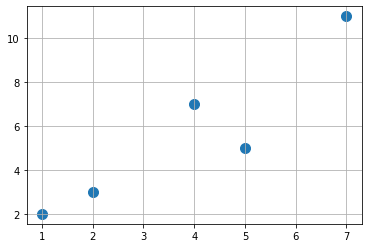

In [12]:
X = np.array([1,2,4,5,7])
Y = np.array([2,3,7,5,11])

plt.scatter(X,Y,s=100)
plt.grid()
plt.show()

* Modelo:
$$
    \large{y=w_1 +w_2 x}\\ \ \\
    w_1=\frac{1}{3},\ 
    w_2=\frac{79}{57}
$$

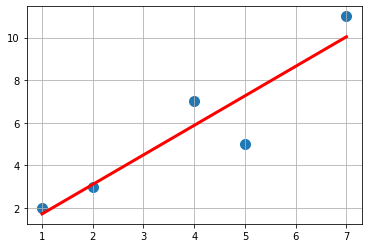

In [13]:
w1 = 1/3
w2 = 79/57
modelo = lambda x : w1+(w2*x)
prediccion = modelo(X)

plt.plot(X,prediccion,color = "red",linewidth = 3)
plt.scatter(X,Y, s = 100)
plt.grid()
plt.show()

### Minimos cuadrados ordinarios vectoriales
Normalmente nunca trabajamos con tan pocos datos y tan pocas dimensiones, normalmente tenemos miles o millones de datos y decenas o cientos de dimensiones, para trabajar con todo esto tenemos el calculo vectorial. Lo primero que necesitamos saber es saber escribir todo lo que hicimos anteriormente como una ecuacion vectorial.

Nuestras ecuaciones se verial algo así:
$$
    y_1=w_0+w_1x_{1,1}+w_2x_{1,2}+w_3x_{1,3}+\dots+w_mx_{1,m} \\
    y_2=w_0+w_1x_{2,1}+w_2x_{2,2}+w_3x_{2,3}+\dots+w_mx_{2,m} \\
    y_3=w_0+w_1x_{3,1}+w_2x_{3,2}+w_3x_{3,3}+\dots+w_mx_{3,m} \\
    \vdots \\
    y_n=w_0+w_1x_{n,1}+w_2x_{n,2}+w_3x_{n,3}+\dots+w_mx_{n,m}
$$

Estos sistemas de ecuaciones podemos escribirlos como matrices:
$$
    Y=\begin{bmatrix}
      y_1\\
      y_2\\
      y_3\\
      \vdots \\
      y_n
      \end{bmatrix} \\ \ \\ \ \\
    X=\begin{bmatrix}
      1 && x_{1,1} && x_{1,2} && x_{1,3} && \cdots && x_{1,m}\\
      1 && x_{2,1} && x_{2,2} && x_{2,3} && \cdots && x_{2,m}\\
      1 && x_{3,1} && x_{3,2} && x_{3,3} && \cdots && x_{3,m}\\
      \vdots && \vdots && \vdots && \vdots && \ddots && \vdots \\
      1 && x_{n,1} && x_{n,2} && x_{n,3} && \cdots && x_{n,m}
      \end{bmatrix} \\ \ \\ \ \\
    W=\begin{bmatrix}
      w_0 && w_1 && w_1 && w_1 && \cdots && w_m
      \end{bmatrix}
$$

Notemos que a la matriz $X$ le agregamos una columna de unos, esto es por el termino independiente en nuestro sistema de ecuaciones, sin esta columna de unos no podriamos obtener el termino independiente.

Nuestra ecuacion matricial quedaria de esta manera:

$$
    \large{Y=WX}
$$

Y de igual manera a como lo hicimos anteriormente debemos derivar y despejar W. El vector que minimiza $ \left\Vert WX-Y \right\Vert^2 $ es $ X^TXW=X^TY $. 

$$
    X^TXW=X^TY \\ \ \\ \ 
    \large{W=(X^TX)^{-1}X^TY}
$$

> Para obtener mas informacion sobre como interpretar este resultado por favor ir a https://en.wikipedia.org/wiki/Ordinary_least_squares#Projection

Esto es algo que ya podriamos programar, para obtener los valores de $W$ automaticamente y no tener que ajustar estos valores a mano. Así que volvamos al ejemplo anterior pero esta vez utilicemos este nuevo metodo para que los valores se ajusten automaticamente.

* Datos:
$$
    X = \begin{bmatrix}
        1 & 1\\
        1 & 2\\
        1 & 4\\
        1 & 5\\
        1 & 7
        \end{bmatrix}\text{ , }\ \ 
    Y_r = \begin{bmatrix}
        2\\
        3\\
        7\\
        5\\
        11
        \end{bmatrix}
$$

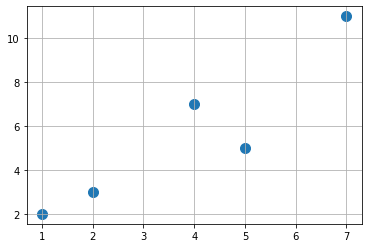

X = 
[1 2 4 5 7]
Y = 
[ 2  3  7  5 11]


In [14]:
X = np.array([1,2,4,5,7])
Y = np.array([2,3,7,5,11])

plt.scatter(X,Y,s=100)
plt.grid()
plt.show()

print("X = ")
print(X)
print("Y = ")
print(Y)

* Modelo:
$$
    \large{y=w_1 +w_2 x}\\ \ \\
$$
* Minimos cuadrados ordinarios:
$$
    W=(X^TX)^{-1}X^TY\\ \ \\
    \begin{bmatrix}
    \large{w_0} \\
    \large{w_1}
    \end{bmatrix}
    =
    \left(
    \ \ \ 
    \begin{bmatrix}
    1&1&1&1&1\\
    1&
    2&
    4&
    5&
    7
    \end{bmatrix}
    \ \ \ 
    \begin{bmatrix}
    1&1\\
    1&2\\
    1&4\\
    1&5\\
    1&7
    \end{bmatrix}
    \ \ \ 
    \right)^{\large{-1}}\ \begin{bmatrix}
    1&1&1&1&1\\
    1&
    2&
    4&
    5&
    7
    \end{bmatrix}\ \begin{bmatrix}
        2\\
        3\\
        7\\
        5\\
        11
        \end{bmatrix}
$$

(Recuerda que debemos agregar una columna de unos a nuestra matriz $X$)

In [15]:
#Agregamos unacolumna de unos a nuestras X y transponemos nuestras matrices
#solo para poder trabajarla de la misma manera que lo hacemos en la ecuacion
#matricial.
X_ = np.array([np.ones(X.size),X]).T
Y_ = Y.T

$$W=(X^TX)^{-1}X^TY$$

In [16]:
#El signo @ se utiliza para el producto punto entre dos matrices
W = np.linalg.inv(np.transpose(X_) @ X_) @ np.transpose(X_) @ Y_

w_0 = W[0]
w_1 = W[1]

print("w_0 = ",w_0)
print("w_1 = ",w_1)

w_0 =  0.33333333333333615
w_1 =  1.3859649122807016


* Ya teniendo nuestros valores para $w_1$ y $w_2$ podemos escribir nuestro modelo
$$y=w_0+w_1x$$

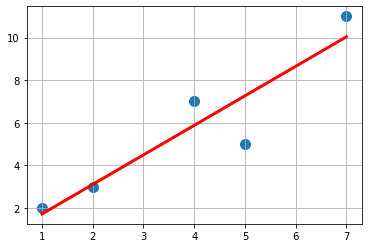

In [17]:
#Nuestro modelo matematico
modelo = lambda x : w_0+(w_1*x)

#Graficamos
plt.scatter(X,Y, s=100)
plt.plot(X,modelo(X), color="red", linewidth = 3)
plt.grid()
plt.show()

Con esto habriamos finalizado nuestra regresion lineal utilizando el metodo de los minimos cuadrados ordinarios. Ahora podriamos incluso utilizar cualquier otro grupo de datos para resolver otros problemas, vamos a aplicar este mismo modelo en un problema mas real, ¿recuerdan el ejemplo de las casas de boston? pues vamos a resolverlo utilizando nuestro nuevo metodo.

* Traigamos nuestro datos:

In [18]:
boston = load_boston()
X = np.array(boston.data[:,5])
Y = np.array(boston.target)
#Recuerda que debemos convertirlos en un array para poder operarlos matematicamente,
#tambien debemos transponerlas solo para que queden igual a como las respresentamos
#anteriormente
X_ = np.array([np.ones(X.size),X]).T
Y_ = Y.T

* Obtengamos los valores para $w_0$ y $w_1$:

In [19]:
W = np.linalg.inv(np.transpose(X_) @ X_) @ np.transpose(X_) @ Y_

w_0 = W[0]
w_1 = W[1]

print("w_0 = ",w_0)
print("w_1 = ",w_1)

w_0 =  -34.670620776437374
w_1 =  9.102108981180091


* Modelo matematico:

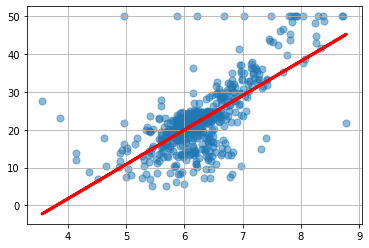

In [20]:
#Nuestro modelo matematico
modelo = lambda x : w_0+(w_1*x)

#Graficamos
plt.scatter(X,Y, s=50, alpha = 0.5)
plt.plot(X,modelo(X), color="red", linewidth = 3)
plt.grid()
plt.show()

## Descenso del gradiente

Para una pequeña cantidad de datos el metodo de minimos cuadrados ordinarios nos puede servir bastante bien, pero nosotros normalmente no vamos a trabajar con pocos datos, si no con millones de datos, y esto hace que los minimos cuadrados ordinarios sean basicamente inservibles en el mundo real, esto sucede porque a los ordenadores les lleva demasiado tiempo resolver una matriz invertida. Por eso es que para inteligencia artificial usamos el algoritmo del descenso del gradiente.

### ¿Como funciona?

En el descenso del gradiente lo que hacemos es empezar desde un punto al azar dentro de nuestra funcion de coste, en ese punto calculamos las derivadas parciales para saber hacia donde deciende nuestra funcion de coste, para asi bajar por la funcion hasta llegar a un minimo, y es ahí donde nuestro error seria el minimo.
> ***Funcion de coste***: Es la funcion que calcula el error de nuestra funcion, para esta guia vamos a utilizar el minimo cuadrado ordinario, pero ten en cuenta que hay muchas otras funciones de coste, como puede ser la funcion *Cross-entropy* una de las mas utilizadas en IA, pero por motivos practicos vamos a estar utilizando la funcion de minimos cuadrados ordinarios.

<img src="gradient-decent.gif" alt="regression">

### Vamos a implementar el descenso del gradiente en la regresion lineal
1. Recordemos nuestra funcion de coste (Minimos cuadrados ordinarios):
$$
\frac{1}{n}\sum_{i=1}^{n}((w_0+w_1 x_{i})-y_{r_i})^2
$$
2. Lo primero que necesitamos es obtener las derivadas parciales de nuestra funcion de coste:

$$
\frac{\partial e}{\partial w_0} = \frac{1}{n}\sum_{i=1}^{n}2((w_0+w_1 x_{i})-y_{r_i})(x_i)\\
\frac{\partial e}{\partial w_0} = \frac{2}{n}\sum_{i=1}^{n}x_i((w_0+w_1 x_{i})-y_{r_i})\\ \ \\ \ \\
\frac{\partial e}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n}2((w_0+w_1 x_{i})-y_{r_i})\\
\frac{\partial e}{\partial w_1} = \frac{2}{n}\sum_{i=1}^{n}((w_0+w_1 x_{i})-y_{r_i})
$$
3. Nuestros valores de $w_0$ y $w_1$ se van a calcular de esta manera (Recuerda que el valor inicial de $w_0$ y $w_1$ se asignan aleatoriamente):

$$
w_0 = w_0 - l\frac{\partial e}{\partial w_0}\\ \ \\ 
w_1 = w_1 -l\frac{\partial e}{\partial w_1}\\ \ \\
l = \text{Learning rate}
$$
> ***Learning rate***: Este termino significa "tasa de aprendizaje" y es un valor por el cual multiplicamos nuestro gradiente para controlar el tamaño de los "pasos" que da nuestro algoritmo en cada iteracion o epoca.

Ahora vamos a escribir nuestro algoritmo.

* Datos de entrenamiento:
$$
    X = \begin{bmatrix}
        1\\
        2\\
        4\\
        5\\
        7
        \end{bmatrix}\text{ , }\ \ 
    Y_r = \begin{bmatrix}
        2\\
        3\\
        7\\
        5\\
        11
        \end{bmatrix}
$$

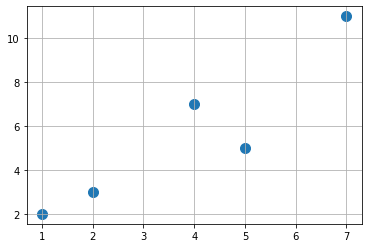

X = 
[1 2 4 5 7]
Y = 
[ 2  3  7  5 11]


In [255]:
X = np.array([1,2,4,5,7])
Y = np.array([2,3,7,5,11])

plt.scatter(X,Y,s=100)
plt.grid()
plt.show()

print("X = ")
print(X)
print("Y = ")
print(Y)

* Construyamos el modelo:

$$
\large{y=w_1 +w_2 x}\\ \ \\
\frac{\partial e}{\partial w_0} = \frac{2}{n}\sum_{i=1}^{n}x_i((w_0+w_1 x_{i})-y_{r_i})\\ \ \\
\frac{\partial e}{\partial w_1} = \frac{2}{n}\sum_{i=1}^{n}((w_0+w_1 x_{i})-y_{r_i})\\ \ \\
w_0 = w_0 - l\frac{\partial e}{\partial w_0}\\ \ \\ 
w_1 = w_1 -l\frac{\partial e}{\partial w_1}\\ \ \\
$$

w_0 =  -0.3565665758539371
w_1 =  1.5516634569000751


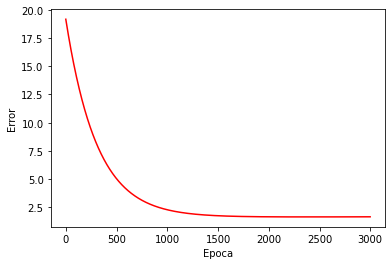

In [308]:
# Valores iniciales
w_0 = 2
w_1 = 2

l = 0.0001 #Learning rate
epochs = 3000 #Epocas, es la cantidad de iteraciones de nuestro descenso del gradiente

#Vamos a guardar el valor del error en cada iteracion para luego graficarlo
error = np.linspace(0,0,epochs)

#Descenso del gradiente
#Esto se le llama entrenamiento
for i in range(epochs):
    #La prediccion con los valores actuales de w_0 y w_1
    Y_pred = w_0 + (w_1*X) 
    #Derivadas parciales
    dw_0 = (2/X.size) * sum(X * (Y_pred-Y))
    dw_1 = (2/X.size) * sum(Y_pred-Y)
    #Nuevos valores para w_0 y w_1
    w_0 = w_0 - (l*dw_0)
    w_1 = w_1 - (l*dw_1)
    #Guardamos el error de esta epoca
    error[i] = sum((Y_pred-Y)**2)/X.size
    
print("w_0 = ",w_0)
print("w_1 = ",w_1)

plt.plot(range(epochs), error, color='red')
plt.xlabel("Epoca")
plt.ylabel("Error")
plt.show()

* Realizamos las predicciones con nuestros datos de entrenamiento y graficamos:

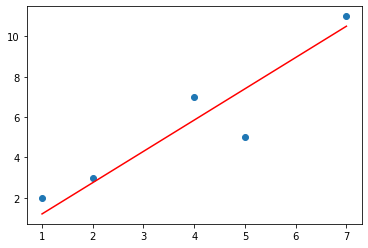

error =  1.6095306624443584


In [309]:
#Realizamos las predicciones con nuestros datos de entrenamiento
Y_pred = w_1*X + w_0

#Graficamos
plt.scatter(X, Y) 
plt.plot(X, Y_pred, color='red')
plt.show()

#Calculamos cuanto es nuestro error cuadratico
print("error = ",sum((Y_pred-Y)**2)/X.size)

En el descenso del gradiente es muy importante los valores iniciales de $w_0$, $w_1$ y $l$ ya que podemos caer en diferentes minimos locales, con la practica podemos aprender a elegir estos valores.
<img src="gradient-descent-multiple-minimuns.png">